In [1]:
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import numpy for numerical operations and array handling
import matplotlib.pyplot as plt  # Import matplotlib for creating visualizations
import seaborn as sns  # Import seaborn for advanced statistical visualizations

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.svm import SVC  # Import Support Vector Classification for SVM models
from sklearn.model_selection import train_test_split, cross_val_score  # Import functions for splitting data and cross-validation
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TF-IDF vectorizer for text feature extraction
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report, roc_auc_score  # Import metrics for model evaluation
from sklearn.neural_network import MLPClassifier  # Import Multi-layer Perceptron classifier
from sklearn.tree import DecisionTreeClassifier # Import Decision tree classifier
from imblearn.over_sampling import SVMSMOTE  # Import SVMSMOTE for handling imbalanced datasets
import nltk  # Import NLTK library for natural language processing
from nltk.tokenize import word_tokenize  # Import word tokenizer
from nltk.corpus import stopwords  # Import stopwords list
from nltk.stem import WordNetLemmatizer  # Import lemmatizer
from nltk.probability import FreqDist  # Import frequency distribution for token frequency analysis
from sklearn.ensemble import AdaBoostClassifier # Import adaboost classifier model

In [4]:
import nltk

nltk.download('punkt')  # Download the tokenizer models
nltk.download('stopwords')  # Download the list of stopwords
nltk.download('wordnet')  # Download the WordNet lexicon for lemmatization

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anuli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anuli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import pandas as pd

import pandas as pd

train = pd.read_csv("C:\\Users\\anuli\\OneDrive\\Desktop\\Multi Label Absuive Comments Identification\\Datasets\\train.csv")  # Load the training data from CSV file
test = pd.read_csv("C:\\Users\\anuli\\OneDrive\\Desktop\\Multi Label Absuive Comments Identification\\Datasets\\test.csv")  # Load the test data from CSV file
sample = pd.read_csv("C:\\Users\\anuli\\OneDrive\\Desktop\\Multi Label Absuive Comments Identification\\Datasets\\sample_submission.csv")  # Load the sample submission file from CSV

In [6]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [7]:
target_columns = list(sample.columns.drop('id'))  # Get a list of all column names in the sample DataFrame except 'id'
target_columns  # Display the list of target columns

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [8]:
train[target_columns].sum()  # Calculate the sum of each target column in the training data to check for label imbalance
# The counts will indicate the distribution of labels and show if the dataset is imbalanced

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [9]:
pip install imbalanced-learn scikit-learn

Note: you may need to restart the kernel to use updated packages.


This code snippet seems to be manipulating a DataFrame named `train`, likely in the context of a machine learning project involving toxicity classification. Here's a breakdown of what each part of the code is doing:

1. **Calculating 'non-toxic' label**:
   - `train['non-toxic'] = 1 - train[target_columns].max(axis=1)`: This line calculates the 'non-toxic' label for each row in the DataFrame. It takes the maximum value across the columns specified in `target_columns` (e.g., 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'), subtracts it from 1, and assigns the result to the 'non-toxic' column. This means if any of the specified toxicity types have a positive value (indicating toxicity), the 'non-toxic' label will be 0, otherwise, it will be 1.

2. **Determining 'toxicity_type_defined'**:
   - `train['toxicity_type_defined'] = train[['insult','obscene','identity_hate','threat']].max(axis=1)`: This line calculates the 'toxicity_type_defined' label for each row in the DataFrame. It takes the maximum value across the specified toxicity types ('insult', 'obscene', 'identity_hate', 'threat') and assigns the result to the 'toxicity_type_defined' column. This label indicates whether any type of toxicity is present in the comment.

3. **Defining 'toxic_undefined'**:
   - `train['toxic_undefined'] = 0`: This line initializes a new column 'toxic_undefined' with all values set to 0.
   - `train.loc[(train['toxicity_type_defined']==0)&(train['toxic']==1),'toxic_undefined'] = 1`: This line sets the value of 'toxic_undefined' to 1 for rows where 'toxicity_type_defined' is 0 (indicating no specific type of toxicity is defined) and 'toxic' is 1 (indicating toxicity is present). This suggests that the toxicity type is undefined even though the comment is toxic.

4. **Defining 'soft_toxic'**:
   - `train['soft_toxic'] = 0`: This line initializes a new column 'soft_toxic' with all values set to 0.
   - `train.loc[(train['toxicity_type_defined']==1)&(train['toxic']==0),'soft_toxic'] = 1`: This line sets the value of 'soft_toxic' to 1 for rows where 'toxicity_type_defined' is 1 (indicating a specific type of toxicity is defined) and 'toxic' is 0 (indicating no toxicity is present). This suggests that although a specific type of toxicity is defined, the comment is not toxic.

5. **Defining 'analysis_columns'**:
   - `analysis_columns = target_columns + ['non-toxic', 'toxic_undefined', 'soft_toxic']`: This line creates a list of column names to be used for analysis. It includes the original target columns ('target_columns'), as well as the newly created labels ('non-toxic', 'toxic_undefined', 'soft_toxic'). These columns are likely used as features or labels for toxicity classification analysis.

In [10]:
train['non-toxic'] = 1 - train[target_columns].max(axis=1)  # Create a column 'non-toxic' indicating if a sample is not labeled as toxic

train['toxicity_type_defined'] = train[['insult', 'obscene', 'identity_hate', 'threat']].max(axis=1)  # Define 'toxicity_type_defined' based on the maximum value among specific toxicity types

train['toxic_undefined'] = 0  # Initialize 'toxic_undefined' column with 0
train.loc[(train['toxicity_type_defined'] == 0) & (train['toxic'] == 1), 'toxic_undefined'] = 1  # Set 'toxic_undefined' to 1 where 'toxicity_type_defined' is 0 but 'toxic' is 1

train['soft_toxic'] = 0  # Initialize 'soft_toxic' column with 0
train.loc[(train['toxicity_type_defined'] == 1) & (train['toxic'] == 0), 'soft_toxic'] = 1  # Set 'soft_toxic' to 1 where 'toxicity_type_defined' is 1 but 'toxic' is 0

analysis_columns = target_columns + ['non-toxic', 'toxic_undefined', 'soft_toxic']  # List of columns for analysis, including new columns created

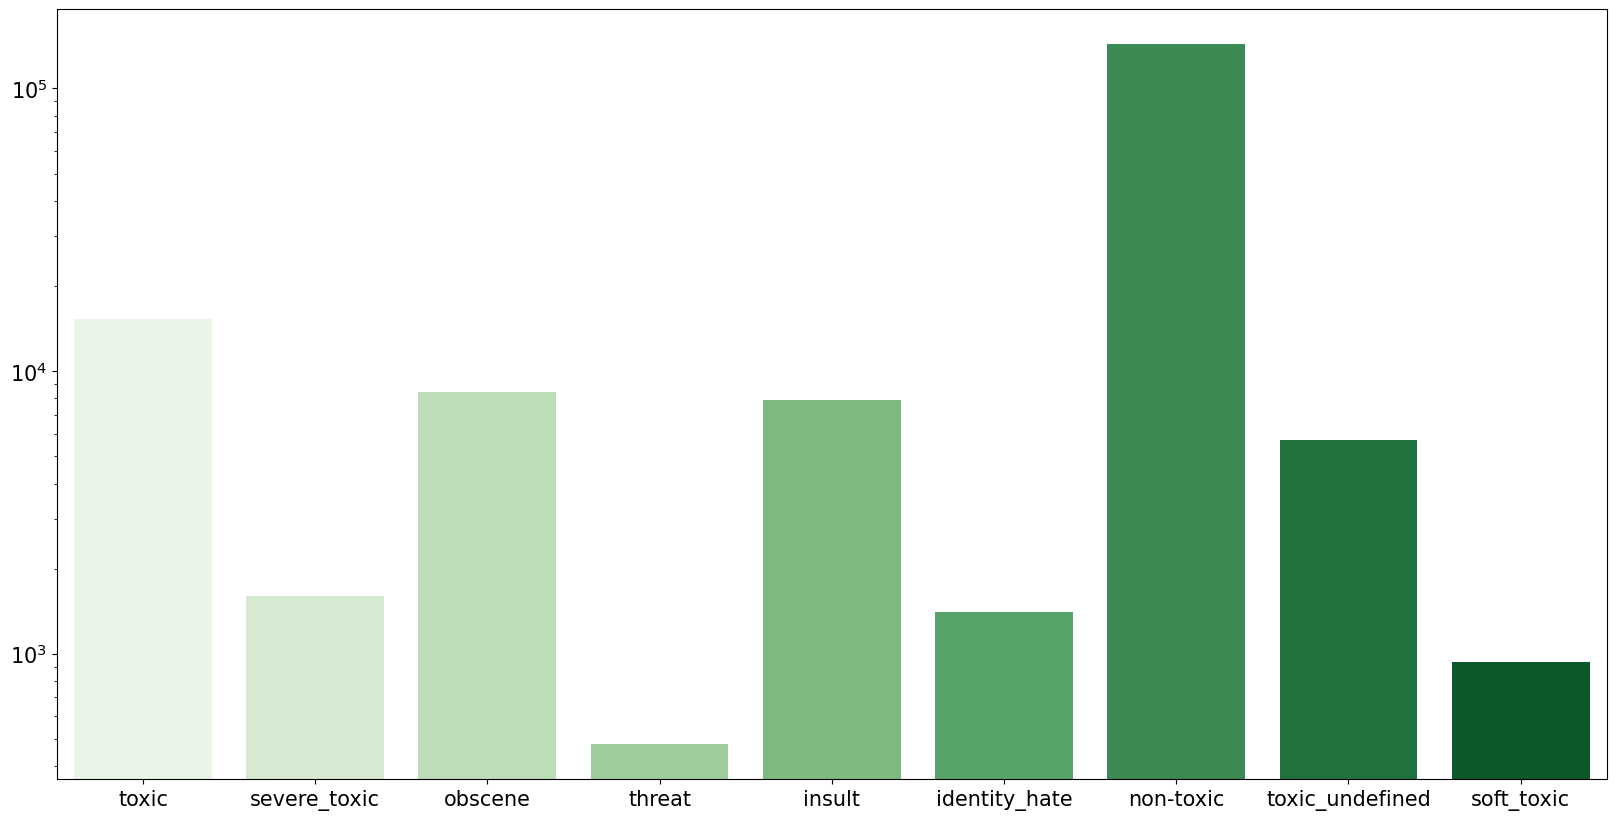

In [11]:
label_counts = train[analysis_columns].sum()  # Calculate the sum of values in each column for analysis

plt.figure(figsize=(20, 10))  # Set the figure size for the plot

# Create a bar plot with label counts
# Change the color of the bars to blue using a predefined palette
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='Greens')

ax.set_yscale("log")  # Set the y-axis to a logarithmic scale for better visualization of imbalances
ax.tick_params(labelsize=15)  # Adjust the size of the tick labels

plt.show()  # Display the plot

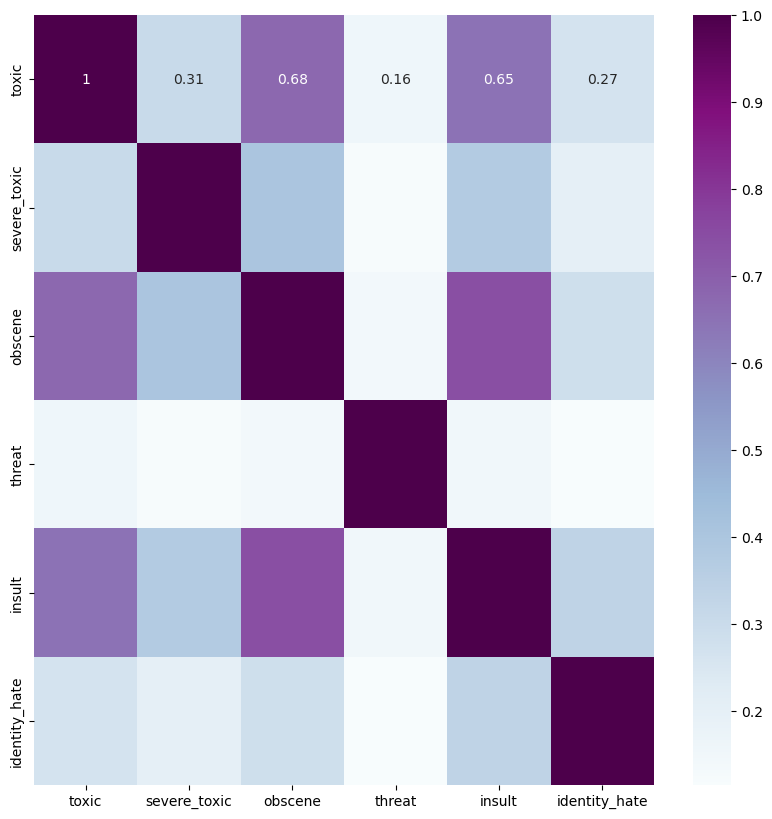

In [12]:
# Visualize any correlations between labels
heatmap_data = train[target_columns]  # Extract data for target columns to compute correlations

plt.figure(figsize=(10, 10))  # Set the figure size for the plot

# Create a heatmap to show correlations between labels
# Use a light color map such as 'BuPu' for a soft combination of blue and purple shades
ax = sns.heatmap(heatmap_data.corr(), cmap='BuPu', annot=True)

ax.tick_params(labelsize=10)  # Adjust the size of the tick labels

plt.show()  # Display the heatmap

In [13]:
train.loc[train['severe_toxic'] == 1, 'toxic'].sum()  # Calculate the sum of 'toxic' labels where 'severe_toxic' is 1

1595

In [14]:
print(type(train))  # Print the type of the 'train' object to confirm it is a DataFrame
print(train.columns)  # Print the column names of the 'train' DataFrame

<class 'pandas.core.frame.DataFrame'>
Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'non-toxic', 'toxicity_type_defined',
       'toxic_undefined', 'soft_toxic'],
      dtype='object')


In [15]:
# Define train_balanced
train_balanced = pd.concat([train[train['non-toxic'] == 1].sample(frac=0.11), train.loc[train['non-toxic'] == 0]])

# Shuffle the DataFrame
train_balanced = train_balanced.sample(frac=1)

# Define target_columns
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'soft_toxic']

In [16]:
train_balanced

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non-toxic,toxicity_type_defined,toxic_undefined,soft_toxic
74117,c64d7a0b3783efca,""" Also you say """"everyone's been suggesting"""" ...",0,0,0,0,0,0,1,0,0,0
110047,4ca84bd071c13aac,There were too many of them warning me about t...,0,0,0,0,0,0,1,0,0,0
101918,215d05c9bec270c5,Roasty blows dead goats,1,0,0,0,0,0,0,0,1,0
80856,d846ceac24f34558,Hater\nyou're such a hater. The Francesca Hogi...,1,0,0,0,0,0,0,0,1,0
150455,6c8949b4c85d7837,"""\n\n Child's Play 3 \n\nSince the case is bac...",0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
111855,5661517c2a513df0,"""\nJosef Mengele never worked on a """"scientifi...",1,1,1,0,1,0,0,1,0,0
16600,2bc52c474fa9e59f,What a shame (and how slightly bizarre) that j...,1,0,0,0,0,0,0,0,1,0
92955,f88a9ce6eca20790,your accusations \n\nyou did what you did with...,0,0,0,0,0,0,1,0,0,0
44780,77a41f803f26462e,Your proposal above is essentially no differen...,0,0,0,0,0,0,1,0,0,0


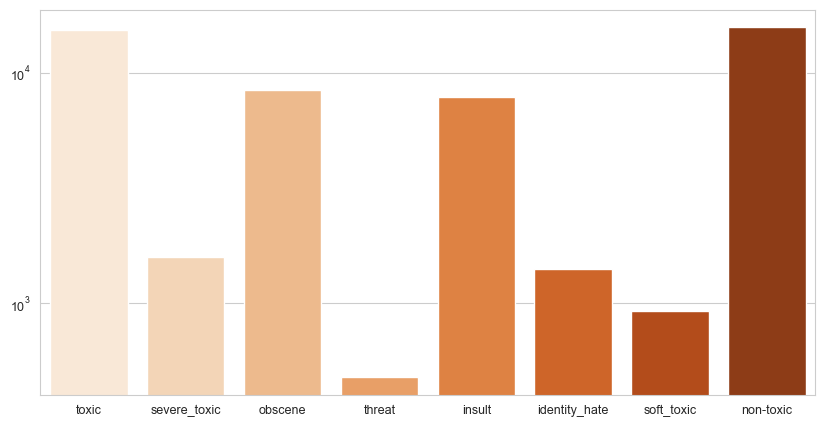

In [17]:
# Define train_balanced
train_balanced = pd.concat([train[train['non-toxic'] == 1].sample(frac=0.11), train.loc[train['non-toxic'] == 0]])

# Shuffle the DataFrame
train_balanced = train_balanced.sample(frac=1)

# Define target_columns
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'soft_toxic']

# Now you can proceed with using train_balanced and target_columns
label_counts = train_balanced[target_columns + ['non-toxic']].sum()
plt.figure(figsize=(10, 5))

# Set seaborn style to whitegrid
sns.set_style("whitegrid")

# Define blue color palette
blue_palette = sns.color_palette("Oranges", len(label_counts))

# Create bar plot with blue theme
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=blue_palette)
ax.set_yscale("log")
ax.tick_params(labelsize=9)

# Show plot
plt.show()

In [18]:
!pip install spacy

In [19]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

all_tokens = []  # List to store tokenized words
lemmas = []  # List to store lemmatized words
nonstop_tokens = []  # List to store tokens after removing stopwords
total_number_of_tokens = []  # List to store total number of tokens in each text
number_of_sentences = []  # List to store number of sentences in each text
number_of_puncts = []  # List to store number of punctuation marks in each text

stop_words = set(stopwords.words('english'))  # Set of English stopwords
lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer

for text in train_balanced['comment_text']:
    # Tokenization
    tokens = word_tokenize(text.lower())  # Tokenize text and convert to lowercase
    all_tokens.append(tokens)
    
    # Lemmatization and stopword removal
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]  # Lemmatize and remove stopwords
    lemmas.append(lemmatized_tokens)
    
    # Non-stopword tokens
    nonstop_tokens.append([word for word in lemmatized_tokens if word not in stop_words])  # Store tokens that are not stopwords
    
    # Total number of tokens
    total_number_of_tokens.append(len(tokens))  # Count total number of tokens
    
    # Number of sentences
    number_of_sentences.append(len(nltk.sent_tokenize(text)))  # Count number of sentences
    
    # Number of punctuations
    number_of_puncts.append(len([char for char in text if char in string.punctuation]))  # Count number of punctuation marks

# Add new columns to the DataFrame
train_balanced['all_tokens'] = all_tokens
train_balanced['nonstop_tokens'] = nonstop_tokens
train_balanced['lemmas'] = lemmas
train_balanced['total_number_of_tokens'] = total_number_of_tokens
train_balanced['number_of_sentences'] = number_of_sentences
train_balanced['number_of_puncts'] = number_of_puncts

This code snippet appears to perform a normalization process on the `'total_number_of_tokens'` column of the `train_balanced` DataFrame using a logarithmic transformation.

Here's a breakdown of what each part of the code does:

1. **Calculate the maximum of log-transformed values**:
   - `log_max = np.log(train_balanced['total_number_of_tokens'].max())`: This calculates the natural logarithm of the maximum value in the `'total_number_of_tokens'` column. It's common to use the maximum value to scale or normalize data.

2. **Apply the logarithmic transformation**:
   - `train_balanced['log_tokens'] = train_balanced['total_number_of_tokens']**(1/log_max)`: This line raises each value in the `'total_number_of_tokens'` column to the power of `1/log_max`. This operation effectively applies a logarithmic transformation to the data, which can help in dealing with skewed distributions and outliers.

3. **Normalize the transformed values**:
   - `upper = train_balanced['log_tokens'].max()`: This calculates the maximum value of the transformed data.
   - `train_balanced['log_tokens_normalised'] = (train_balanced['log_tokens'])/(upper)`: This line normalizes the transformed values by dividing each value by the maximum value obtained in the previous step. This ensures that the transformed values are scaled between 0 and 1.

4. **Usage of the transformed data**:
   - The transformed and normalized values are stored in the new column `'log_tokens_normalised'`. This column can be used for further analysis or modeling.

Overall, this process helps in transforming and normalizing the `'total_number_of_tokens'` column, which might be useful for certain types of analysis or modeling tasks.

In [20]:
import numpy as np

log_max = np.log(train_balanced['total_number_of_tokens'].max())  # Calculate the logarithm of the maximum number of tokens
train_balanced['log_tokens'] = train_balanced['total_number_of_tokens']**(1/log_max)  # Apply a root transformation to the total number of tokens
upper = train_balanced['log_tokens'].max()  # Find the maximum value of the transformed 'log_tokens'
train_balanced['log_tokens_normalised'] = train_balanced['log_tokens'] / upper  # Normalize the transformed 'log_tokens' by dividing by the maximum value

# Note: Commented-out line appears incomplete and needs revision.
# helpful_log_max_root = df.Helpful_Votes**(1/log_maxlog_max

c:\Users\anuli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\anuli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\anuli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\anuli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\anuli\a

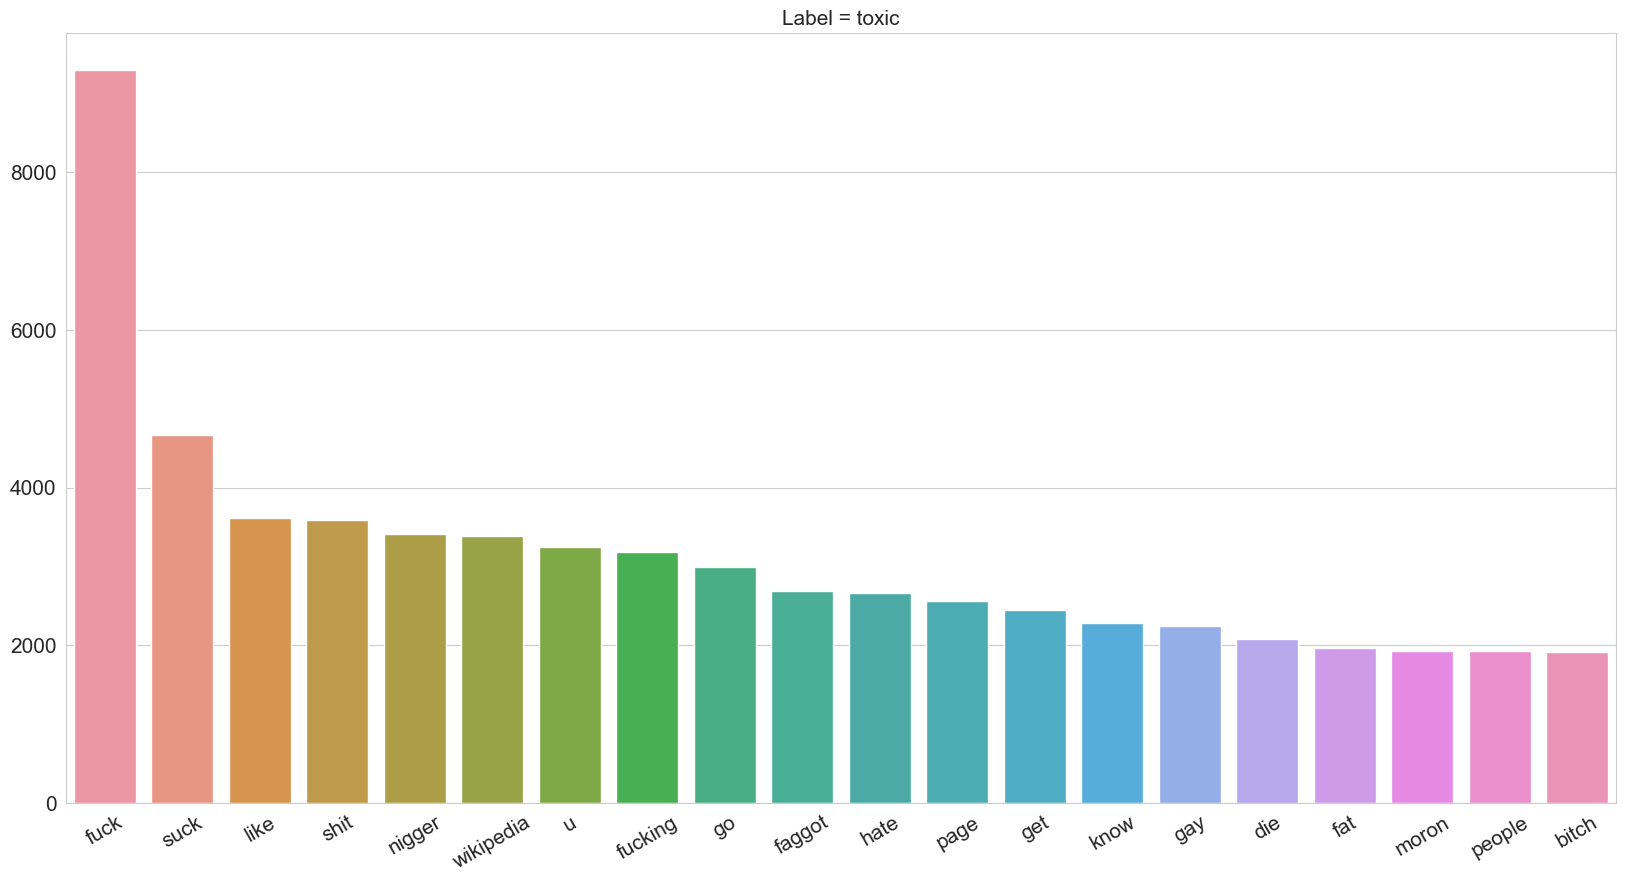

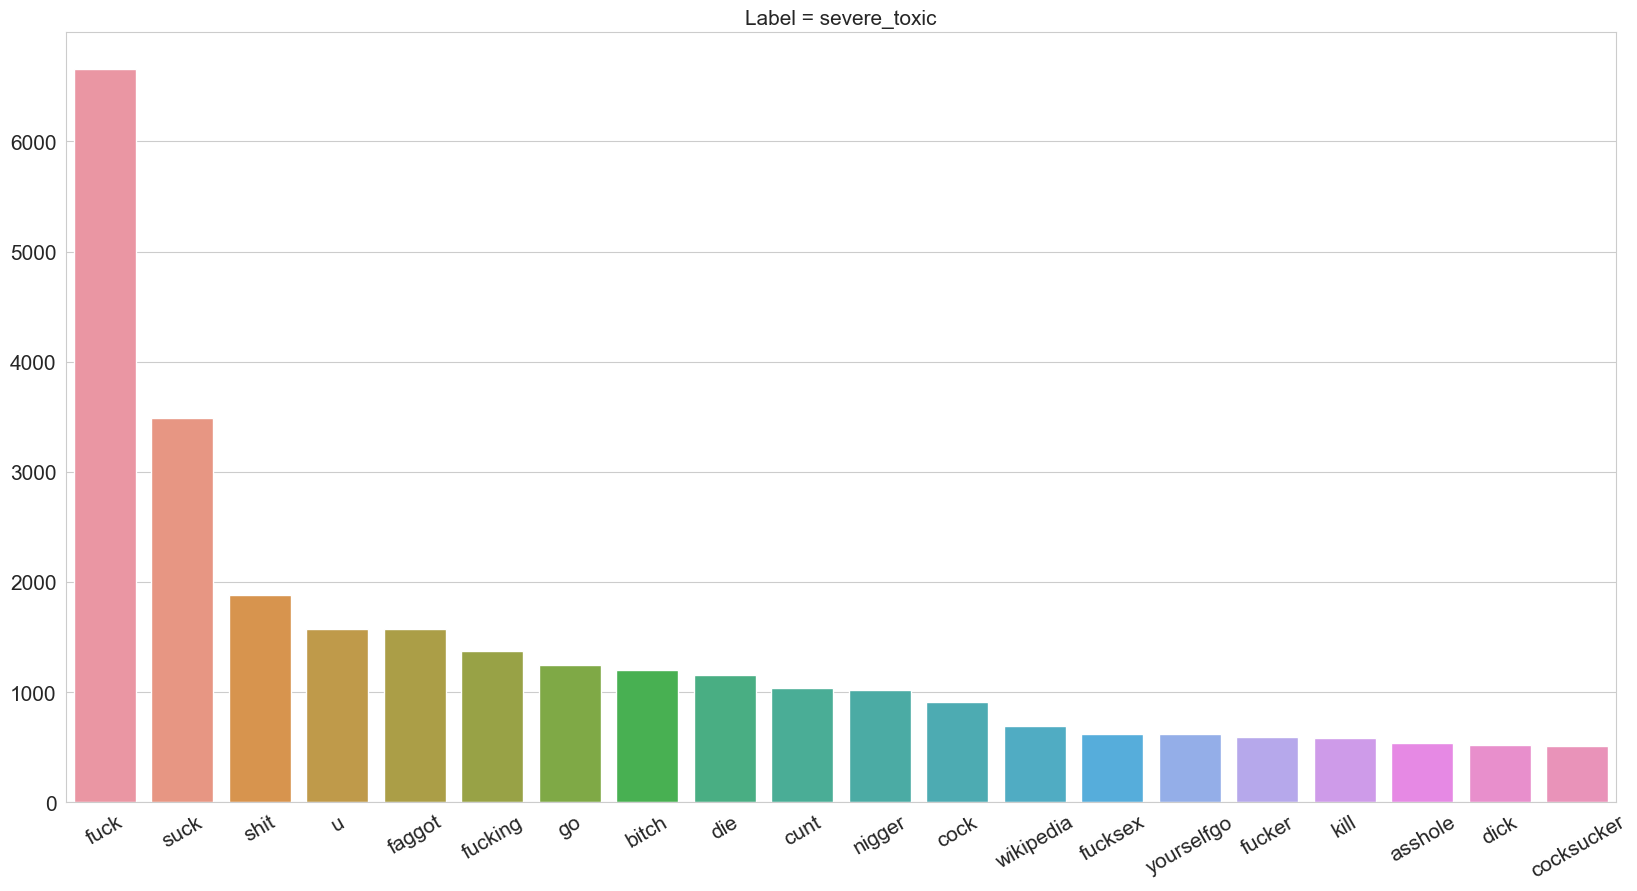

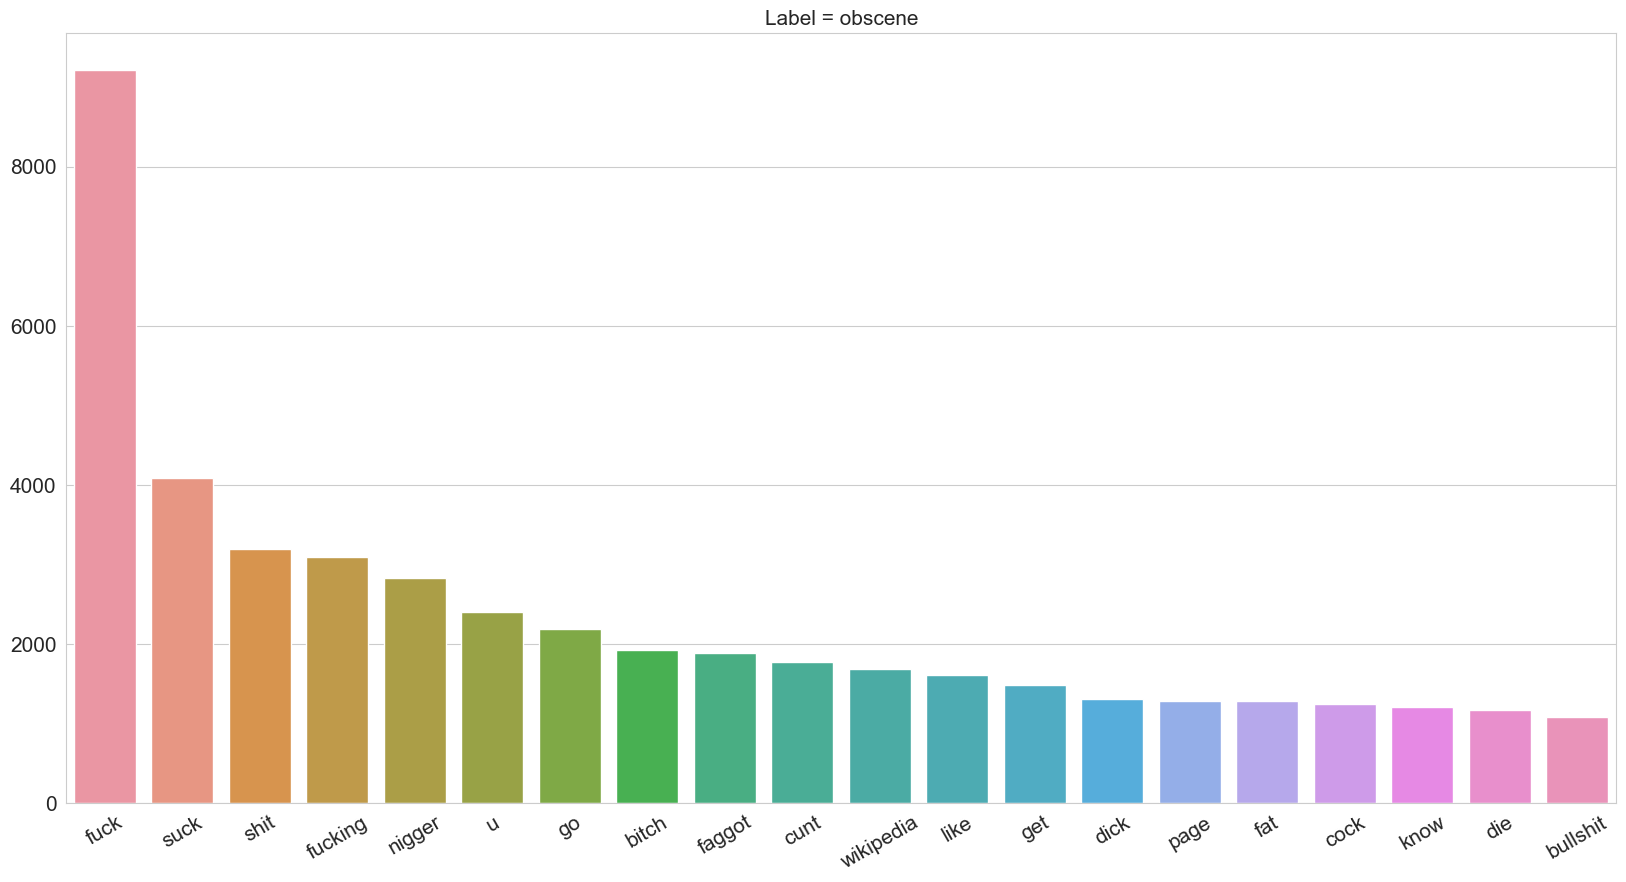

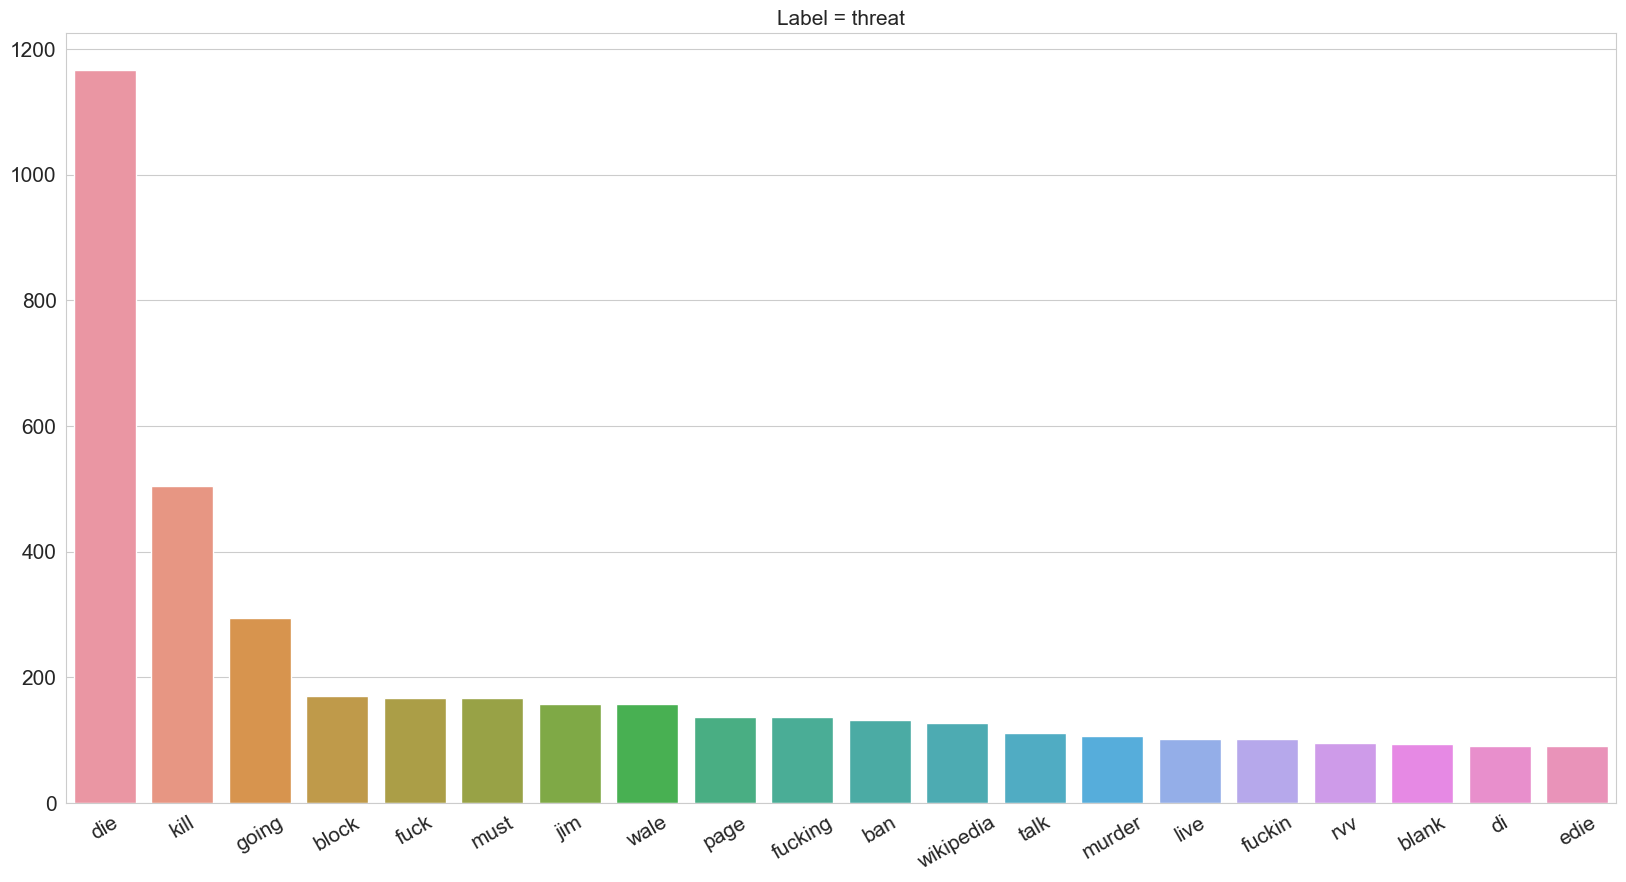

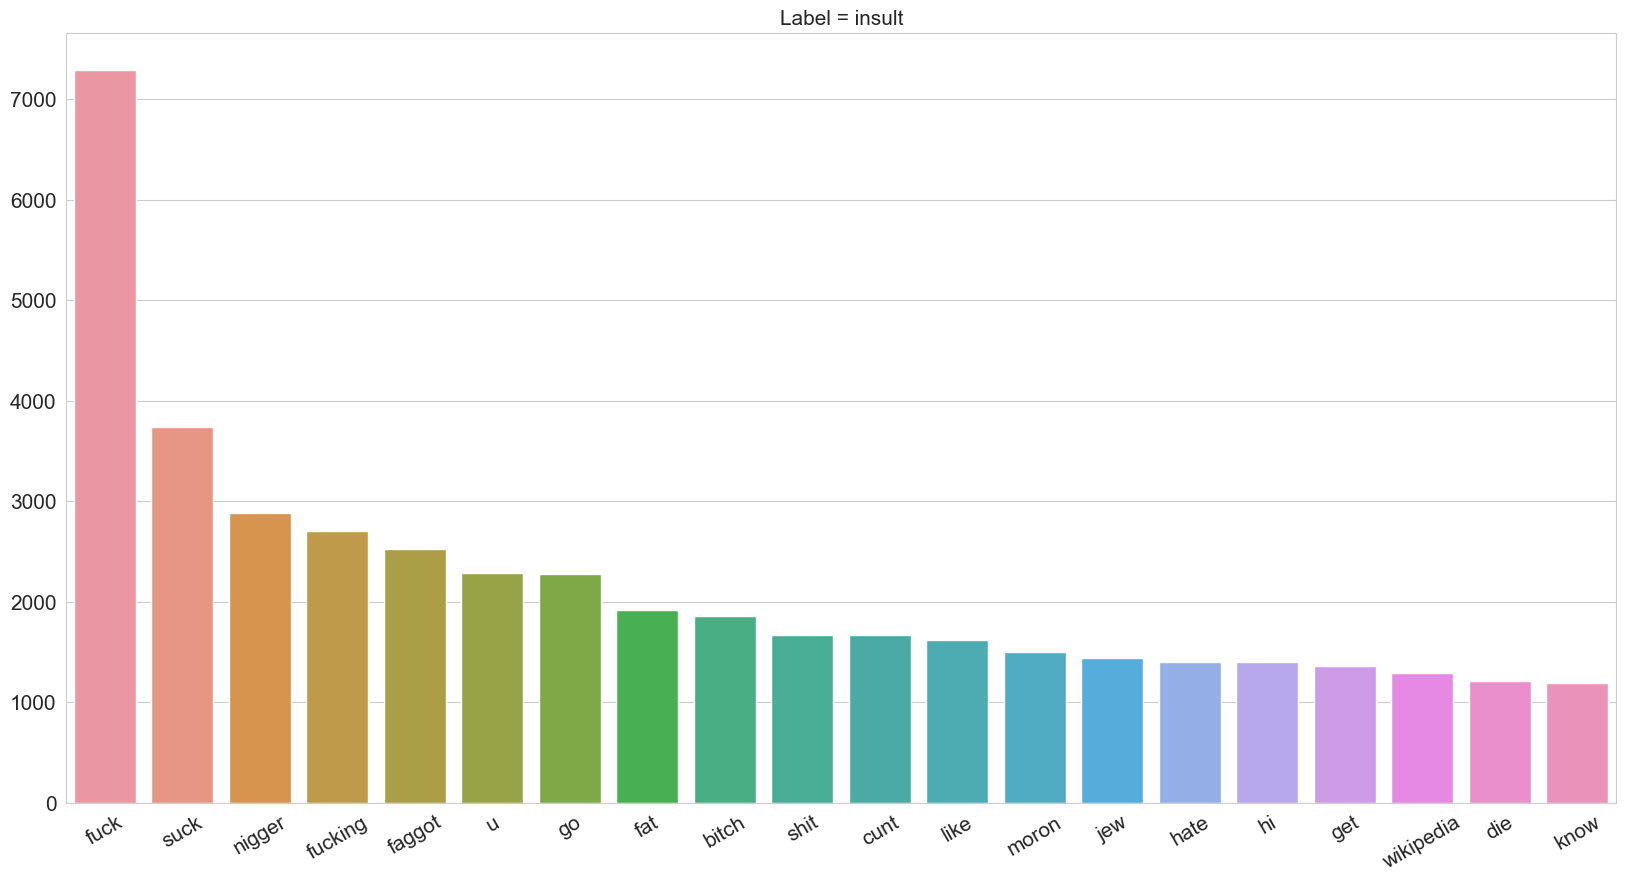

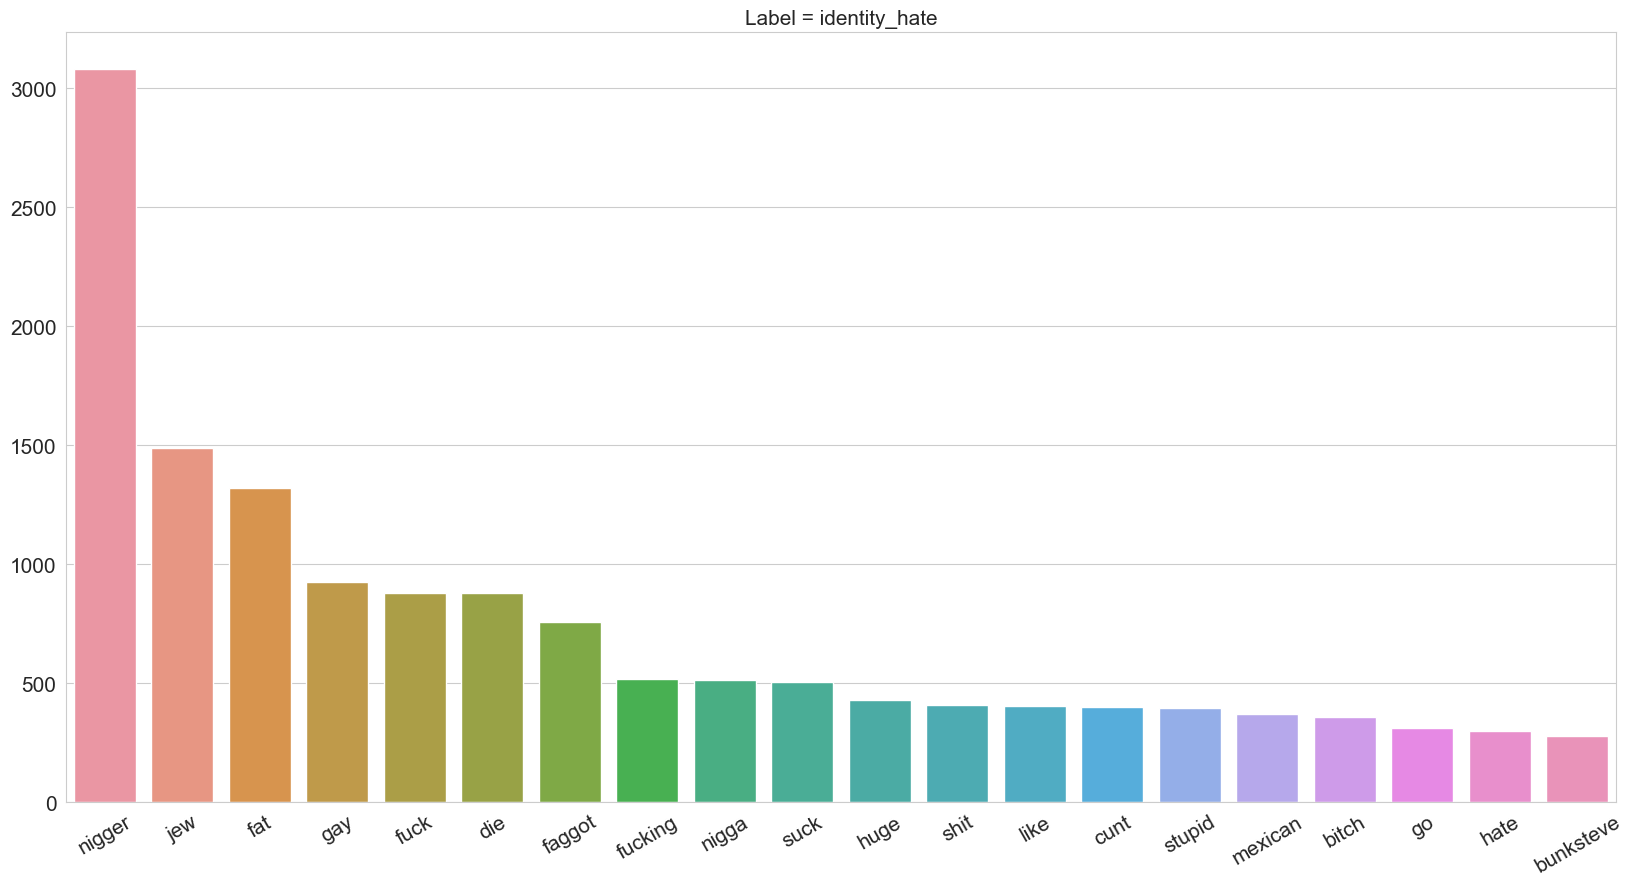

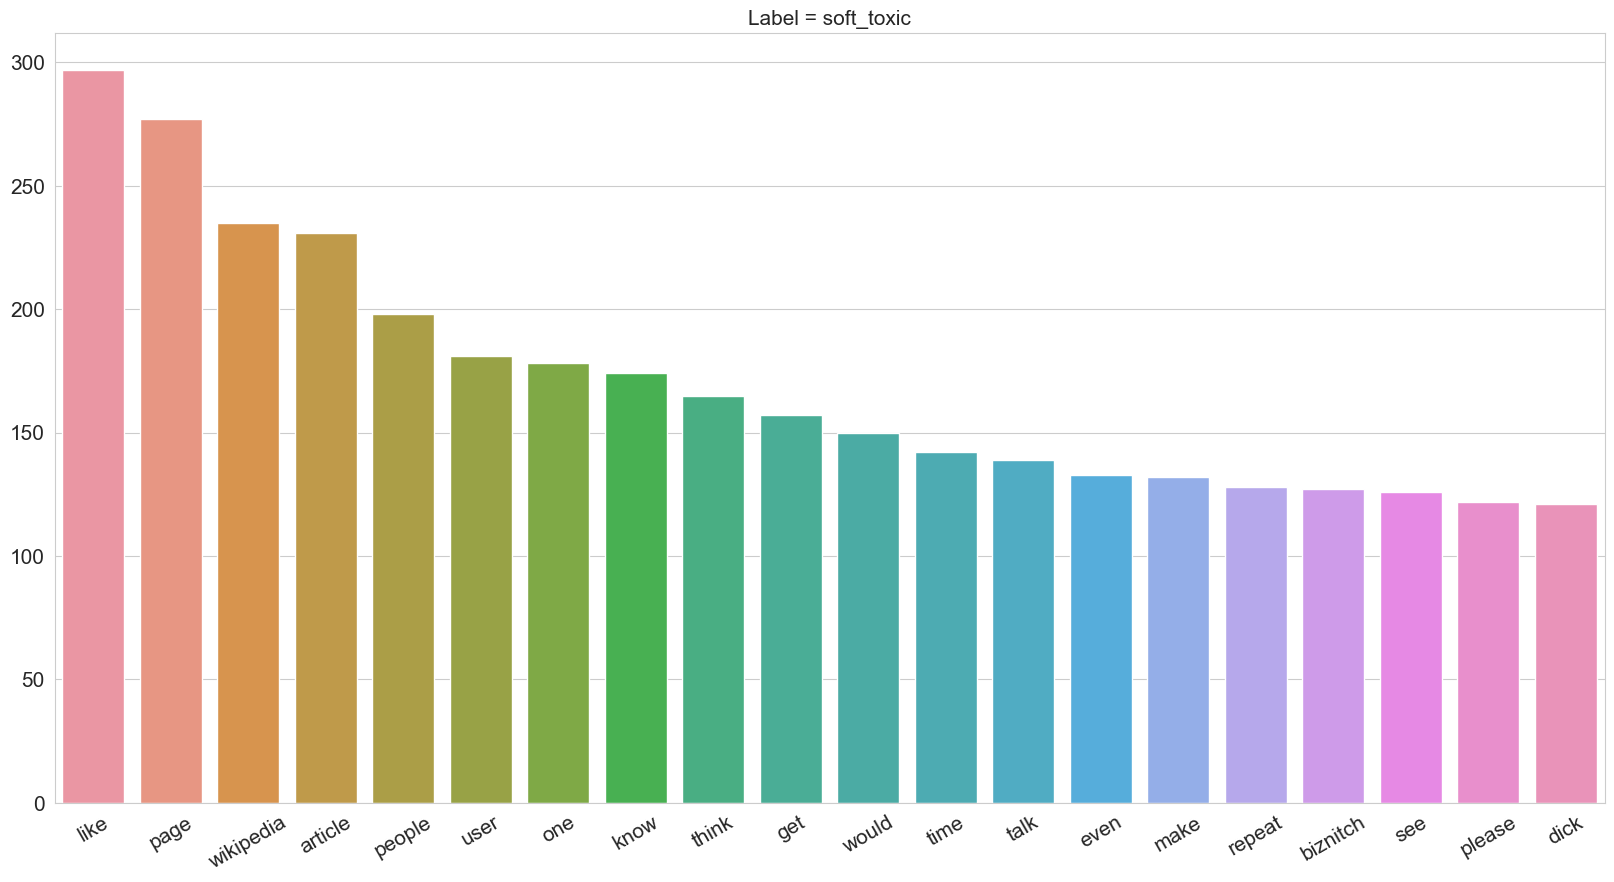

In [21]:
import collections
import seaborn as sns
import matplotlib.pyplot as plt

for label in target_columns:
    # Extract words for the current label where it is set to 1 and flatten the list
    word_list = list(train_balanced.loc[train_balanced[label] == 1, 'nonstop_tokens'].explode())
    
    # Find the 20 most common words and their counts
    most_common = collections.Counter(word_list).most_common(20)
    words = [w for w, _ in most_common]
    counts = [c for _, c in most_common]
    
    # Create a bar plot to visualize the most common words
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(x=words, y=counts)
    ax.set_title(f'Label = {label}', fontsize=15)  # Set the title for the plot
    ax.tick_params(labelsize=15)  # Adjust the size of the tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  # Rotate x-axis labels for better readability

This code is splitting the `train_balanced` DataFrame into a training set and a validation set. 

Here's a breakdown of what each line does:

1. `val_border = int(len(train_balanced) * 0.6)`: This calculates the index at which to split the DataFrame. It takes 60% of the length of the `train_balanced` DataFrame and converts it to an integer.

2. `validation_set = train_balanced[val_border:].copy()`: This creates a copy of the DataFrame `train_balanced` from the index `val_border` to the end. This portion of the DataFrame becomes the validation set.

So, essentially, this code splits the `train_balanced` DataFrame into a training set (the first 60% of the data) and a validation set (the remaining 40% of the data). The validation set is stored in the `validation_set` variable.

In [22]:
val_border = int(len(train_balanced)*0.6)
validation_set = train_balanced[val_border:].copy()

In [23]:
compare_set = ['toxic', 'insult', 'obscene']

1. `vectorizer = TfidfVectorizer(ngram_range=(1, 5), max_features=5000)`: This line creates a TF-IDF vectorizer object. `ngram_range=(1, 5)` specifies that the vectorizer should consider unigrams (single words) up to 5-grams (sequences of up to 5 words). `max_features=5000` limits the number of features (unique words or n-grams) to 5000, which helps reduce the dimensionality of the resulting vector representations.

2. `vectorizer.fit(train_balanced['comment_text'])`: This line fits the TF-IDF vectorizer to the text data in the `'comment_text'` column of the `train_balanced` DataFrame. This process learns the vocabulary from the text data and computes the IDF (Inverse Document Frequency) values for each term in the vocabulary.

The TF-IDF vectorizer is a common tool used in natural language processing (NLP) to convert text data into numerical vectors. It represents each document (in this case, each comment) as a vector, where each element of the vector corresponds to the TF-IDF weight of a term in the vocabulary. This allows machine learning models to work with text data by treating it as numerical data.

In [24]:
vectorizer = TfidfVectorizer(ngram_range=(1, 5), max_features=5000)
vectorizer.fit(train_balanced['comment_text'])
vectorizer

TfidfVectorizer(max_features=5000, ngram_range=(1, 5))

The TfidfVectorizer is a feature extraction technique commonly used in natural language processing (NLP) tasks. When you fit the TfidfVectorizer to a corpus of text data, such as comments in your case, it learns the vocabulary from the corpus and calculates the Term Frequency-Inverse Document Frequency (TF-IDF) values for each term in the vocabulary.

Here's a breakdown of what it does:

1. **Learning the vocabulary**: The TfidfVectorizer scans through the text data and builds a vocabulary of all unique words (or n-grams, depending on the specified `ngram_range`) that appear in the corpus. It assigns a unique index to each word in the vocabulary.

2. **Calculating TF-IDF values**: TF-IDF stands for Term Frequency-Inverse Document Frequency. For each term in the vocabulary, TF-IDF calculates a numerical value that represents its importance in a document relative to the entire corpus. This value takes into account both the frequency of the term in the document (Term Frequency) and the rarity of the term across all documents (Inverse Document Frequency).

3. **Transforming text data**: Once the TfidfVectorizer is fitted to the text data, you can use it to transform new text data into a numerical representation. This representation typically consists of sparse matrices where each row corresponds to a document (comment) and each column corresponds to a term in the vocabulary. The values in the matrix represent the TF-IDF scores of the terms in the corresponding documents.

In summary, the TfidfVectorizer learns the vocabulary and calculates TF-IDF values from the training text data, and then it transforms new text data into numerical features based on this learned vocabulary and TF-IDF values. These numerical features can then be used as input to machine learning models for tasks such as classification, clustering, or regression.

In [25]:
x_train = vectorizer.transform(train_balanced['comment_text'])

In [26]:
x_train

<31993x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1320998 stored elements in Compressed Sparse Row format>

In [27]:
# Calculate the sum of each label across all comments
label_counts = train_balanced[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

print("Label Distribution:")
print(label_counts)

Label Distribution:
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [28]:
x_train = vectorizer.transform(train_balanced['comment_text'])

We define a new target column 'non_toxic', which represents the absence of all toxic behaviors. It is calculated as the complement of the maximum value across all toxic behavior columns.
We iterate through all target columns, including the new 'non_toxic' column.
For toxic behavior columns, we calculate and print the classification report and AUC score as before.
For the 'non_toxic' column, we invert the predictions (as it represents the absence of toxic behavior) and calculate and print the classification report and AUC score separately for the non-toxic class.
Finally, we calculate and print the average AUC scores separately for toxic and non-toxic classes.

Certainly! Let's break it down further:

1. **Text Comment**: "Some Say She is a little mother f***ing bitchy."
   
2. **Binary Values for Toxic Behavior Categories**:
   - `toxic`: 1 (indicating toxic behavior)
   - `severe_toxic`: 0 (no severe toxic behavior)
   - `obscene`: 1 (indicating obscene behavior)
   - `threat`: 0 (no threat)
   - `insult`: 1 (indicating insulting behavior)
   - `identity_hate`: 0 (no identity hate)
   - `soft_toxic`: 0 (no soft toxic behavior)
   - `non_toxic`: 1 (indicating non-toxic)

3. **Classification**:
   - The comment contains toxic, obscene, and insulting behavior but does not contain severe toxic behavior, threats, identity hate, or soft toxic behavior.
   - Despite the presence of some toxic behaviors, it's labeled as non-toxic.

4. **Algorithm's Decision**:
   - The algorithm's decision depends on how it interprets and weighs each type of toxic behavior.
   - If it considers any form of toxic behavior to classify a comment as toxic, it may classify this comment as toxic due to the presence of toxic, obscene, and insulting behavior.
   - If it requires a certain threshold of multiple toxic behavior categories to classify a comment as toxic, it may classify this comment as non-toxic because it lacks severe toxic behavior, threats, identity hate, and soft toxic behavior.

In summary, the algorithm's decision is influenced by its understanding of toxic behavior patterns learned from the training data and how it sets the classification threshold for determining toxicity.

In [29]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
train_balanced = pd.read_csv('C:\\Users\\anuli\\OneDrive\\Desktop\\Multi Label Absuive Comments Identification\\Datasets\\train.csv')  # Adjust path as necessary

# Define target columns and add 'non_toxic'
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_balanced['non_toxic'] = 1 - train_balanced[target_columns].max(axis=1)

# Use your pre-defined vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 5), max_features=3000)  # Reduced max_features
vectorizer.fit(train_balanced['comment_text'])

# Transform the text data into a feature matrix
f_matrix_train = vectorizer.transform(train_balanced['comment_text'])

# Define feature matrix and labels
x_train = f_matrix_train
y_train = train_balanced[target_columns + ['non_toxic']].values

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Initialize models and metrics
models = {}
metrics_summary = {}
average_auc_toxic = 0
average_auc_non_toxic = 0

# Train a model for each label
for idx, label in enumerate(target_columns + ['non_toxic']):
    # Initialize and train the AdaBoost model
    models[label] = AdaBoostClassifier(random_state=42)
    models[label].fit(x_train, y_train[:, idx])
    
    # Make predictions and calculate probabilities
    predictions = models[label].predict(x_val)
    prediction_probs = models[label].predict_proba(x_val)[:, 1]
    
    # Calculate metrics
    roc_auc = roc_auc_score(y_val[:, idx], prediction_probs)
    precision = precision_score(y_val[:, idx], predictions)
    recall = recall_score(y_val[:, idx], predictions)
    f1 = f1_score(y_val[:, idx], predictions)
    accuracy = accuracy_score(y_val[:, idx], predictions)
    report = classification_report(y_val[:, idx], predictions, output_dict=True)
    
    # Store metrics in the dictionary
    metrics_summary[label] = {
        'ROC AUC': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy,
        'Classification Report': report
    }
    
    # Print metrics for each label
    print(f'Label = {label}')
    print(f'ROC AUC: {roc_auc}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{report}\n')
    
    # Accumulate AUC for averaging
    if label != 'non_toxic':
        average_auc_toxic += roc_auc
    else:
        average_auc_non_toxic = roc_auc

# Calculate average AUC
average_auc_toxic /= len(target_columns)
average_auc_non_toxic /= 1  # Only one non-toxic class
                                                                                                    
# Print average AUC
print(f'Average AUC for Toxic: {average_auc_toxic}')
print(f'Average AUC for Non-Toxic: {average_auc_non_toxic}')

# Store metrics_summary as a DataFrame if needed
metrics_df = pd.DataFrame(metrics_summary).T

Label = toxic
ROC AUC: 0.9169805668706251
Precision: 0.8667023554603854
Recall: 0.5297774869109948
F1 Score: 0.6575954508529651
Accuracy: 0.9471721760927464
Classification Report:
{'0': {'precision': 0.952174925949346, 'recall': 0.9913718424061818, 'f1-score': 0.9713781278647337, 'support': 28859}, '1': {'precision': 0.8667023554603854, 'recall': 0.5297774869109948, 'f1-score': 0.6575954508529651, 'support': 3056}, 'accuracy': 0.9471721760927464, 'macro avg': {'precision': 0.9094386407048658, 'recall': 0.7605746646585883, 'f1-score': 0.8144867893588494, 'support': 31915}, 'weighted avg': {'precision': 0.9439905557342665, 'recall': 0.9471721760927464, 'f1-score': 0.9413320723752157, 'support': 31915}}

Label = severe_toxic
ROC AUC: 0.9516449158196172
Precision: 0.4519774011299435
Recall: 0.24922118380062305
F1 Score: 0.321285140562249
Accuracy: 0.9894093686354379
Classification Report:
{'0': {'precision': 0.9924065788644527, 'recall': 0.9969297967968601, 'f1-score': 0.9946630455378007, 

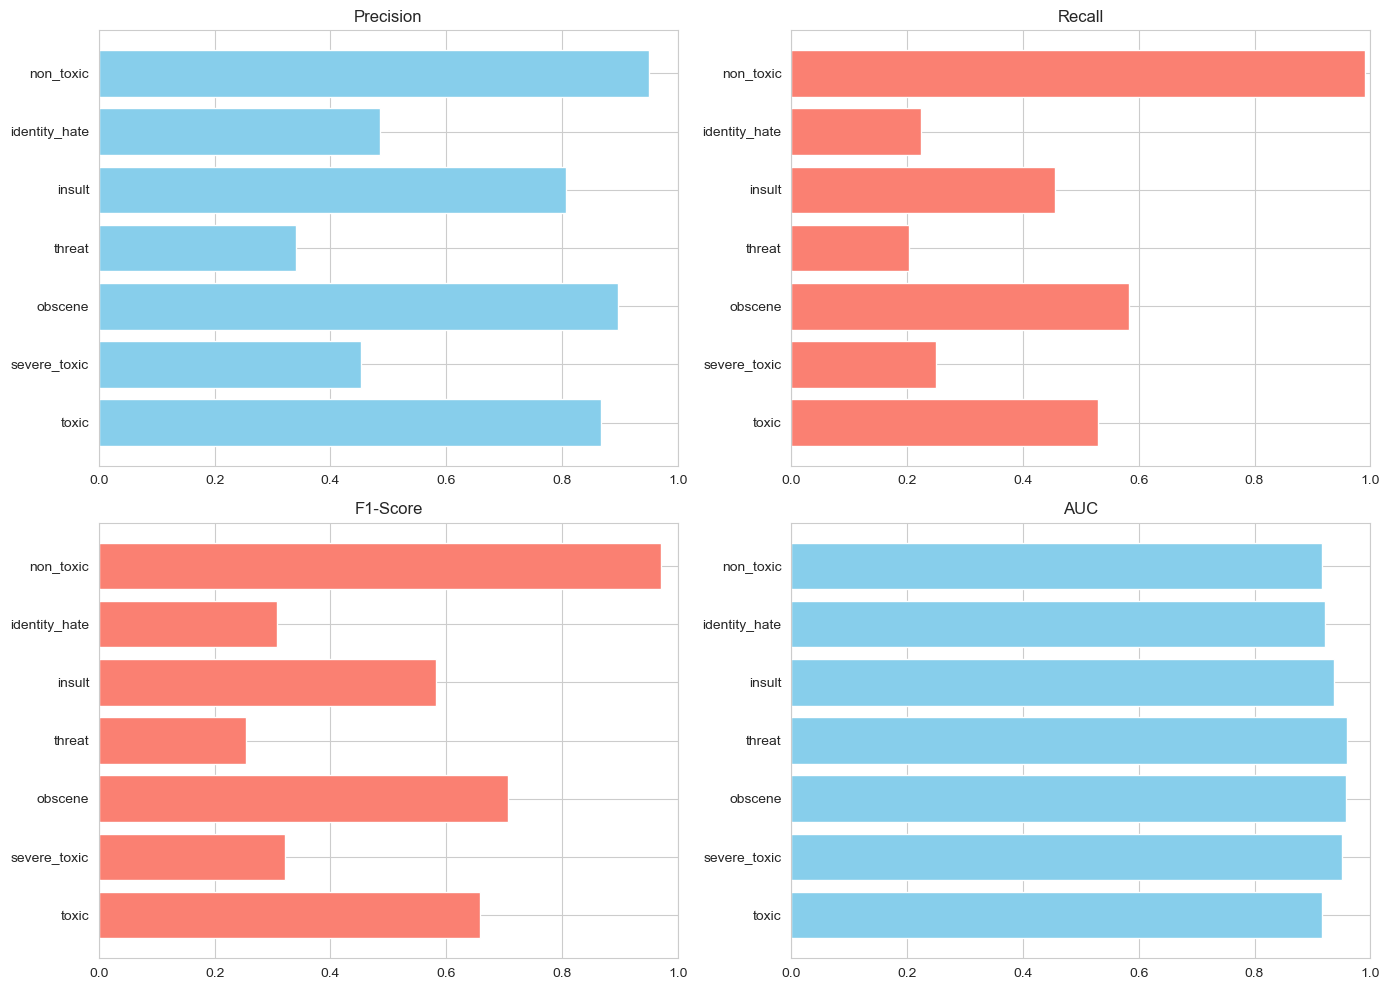

In [30]:
import matplotlib.pyplot as plt

# Define the labels and corresponding metrics
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']
precision = [0.8667, 0.4520, 0.8969, 0.3409, 0.8077, 0.4853, 0.9508]
recall = [0.5298, 0.2492, 0.5831, 0.2027, 0.4554, 0.2245, 0.9916]
f1_score = [0.6576, 0.3213, 0.7067, 0.2542, 0.5824, 0.3070, 0.9707]
auc = [0.9170, 0.9516, 0.9583, 0.9595, 0.9372, 0.9209, 0.9159]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot precision
axs[0, 0].barh(labels, precision, color='skyblue')
axs[0, 0].set_title('Precision')
axs[0, 0].set_xlim(0, 1)

# Plot recall
axs[0, 1].barh(labels, recall, color='salmon')
axs[0, 1].set_title('Recall')
axs[0, 1].set_xlim(0, 1)

# Plot F1-score
axs[1, 0].barh(labels, f1_score, color='salmon')
axs[1, 0].set_title('F1-Score')
axs[1, 0].set_xlim(0, 1)

# Plot AUC
axs[1, 1].barh(labels, auc, color='skyblue')
axs[1, 1].set_title('AUC')
axs[1, 1].set_xlim(0, 1)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [31]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, min_df=2, max_df=0.7)
vectorizer.fit(train['comment_text'])
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.7,
 'max_features': 10000,
 'min_df': 2,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [32]:
x_train = vectorizer.transform(train['comment_text'])
x_test = vectorizer.transform(test['comment_text'])

In [33]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier()

# Assuming you have already trained ada_classifier and x_test is your test data
for label in target_columns:
    ada_classifier.fit(x_train, train[label])
    test[label] = ada_classifier.predict_proba(x_test)[:,1]